In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [2]:
#onecall = True  # 8 days
onecall = False # 5 days

In [3]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [4]:
onecall = False

In [5]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [6]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1734037200, 'main': {'temp': 3.03, 'feels_like': 0.94, 'temp_min': 3.03, 'temp_max': 3.57, 'pressure': 1028, 'sea_level': 1028, 'grnd_level': 1018, 'humidity': 85, 'temp_kf': -0.54}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 100}, 'wind': {'speed': 2.12, 'deg': 72, 'gust': 6.33}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-12-12 21:00:00'}, {'dt': 1734048000, 'main': {'temp': 2.99, 'feels_like': 1, 'temp_min': 2.91, 'temp_max': 2.99, 'pressure': 1028, 'sea_level': 1028, 'grnd_level': 1016, 'humidity': 83, 'temp_kf': 0.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 77}, 'wind': {'speed': 2.02, 'deg': 70, 'gust': 5.82}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-12-13 00:00:00'}, {'dt': 1734058800, 'main': {'temp': 2.54, 'feels_li

In [7]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1734037200
main          {'temp': 3.03, 'feels_like': 0.94, 'temp_min':...
weather       [{'id': 804, 'main': 'Clouds', 'description': ...
clouds                                             {'all': 100}
wind                   {'speed': 2.12, 'deg': 72, 'gust': 6.33}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'n'}
dt_txt                                      2024-12-12 21:00:00
rain                                                        NaN
Name: 0, dtype: object


In [8]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [9]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   12/12 22:00  22:00      3.57      3.03
1   13/12 01:00  01:00      2.99      2.91
2   13/12 04:00  04:00      2.54      2.29
3   13/12 07:00  07:00      1.72      1.72
4   13/12 10:00  10:00      1.99      1.99
5   13/12 13:00  13:00      4.43      4.43
6   13/12 16:00  16:00      5.31      5.31
7   13/12 19:00  19:00      4.52      4.52
8   13/12 22:00  22:00      4.07      4.07
9   14/12 01:00  01:00      4.60      4.60
10  14/12 04:00  04:00      4.91      4.91
11  14/12 07:00  07:00      5.02      5.02
12  14/12 10:00  10:00      5.28      5.28
13  14/12 13:00  13:00      6.84      6.84
14  14/12 16:00  16:00      7.39      7.39
15  14/12 19:00  19:00      6.86      6.86
16  14/12 22:00  22:00      6.23      6.23
17  15/12 01:00  01:00      5.36      5.36
18  15/12 04:00  04:00      4.66      4.66
19  15/12 07:00  07:00      4.28      4.28
20  15/12 10:00  10:00      4.72      4.72
21  15/12 13:00  13:00      7.55      7.55
22  15/12 1

In [10]:
_5days['human_date']

0     12/12 22:00
1     13/12 01:00
2     13/12 04:00
3     13/12 07:00
4     13/12 10:00
5     13/12 13:00
6     13/12 16:00
7     13/12 19:00
8     13/12 22:00
9     14/12 01:00
10    14/12 04:00
11    14/12 07:00
12    14/12 10:00
13    14/12 13:00
14    14/12 16:00
15    14/12 19:00
16    14/12 22:00
17    15/12 01:00
18    15/12 04:00
19    15/12 07:00
20    15/12 10:00
21    15/12 13:00
22    15/12 16:00
23    15/12 19:00
24    15/12 22:00
25    16/12 01:00
26    16/12 04:00
27    16/12 07:00
28    16/12 10:00
29    16/12 13:00
30    16/12 16:00
31    16/12 19:00
32    16/12 22:00
33    17/12 01:00
34    17/12 04:00
35    17/12 07:00
36    17/12 10:00
37    17/12 13:00
38    17/12 16:00
39    17/12 19:00
Name: human_date, dtype: object

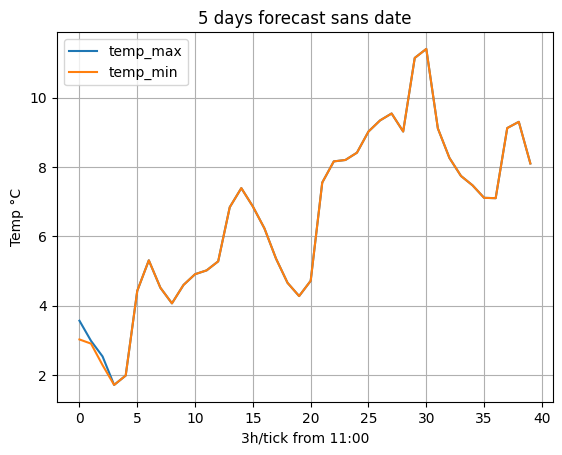

In [11]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [12]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

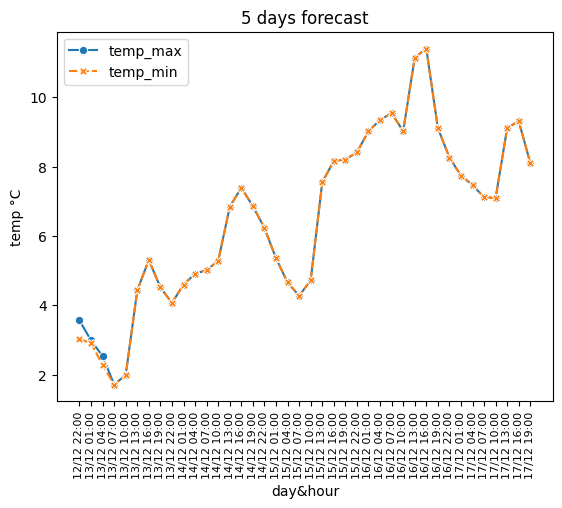

In [13]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

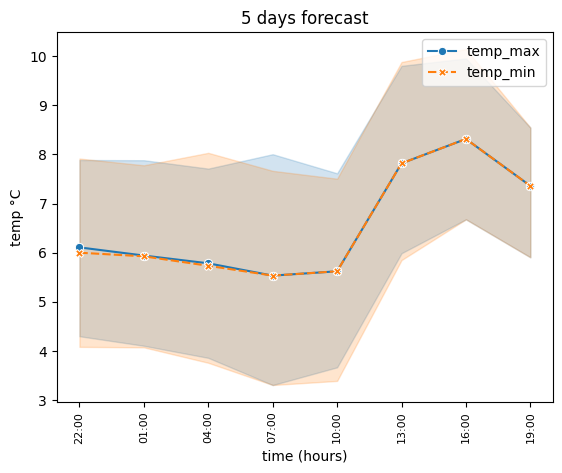

In [14]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 

In [15]:
df2

,temp_max,temp_min
time,,
22:00,3.57,3.03
01:00,2.99,2.91
04:00,2.54,2.29
07:00,1.72,1.72
10:00,1.99,1.99
13:00,4.43,4.43
16:00,5.31,5.31
19:00,4.52,4.52
22:00,4.07,4.07


In [16]:
df2_grp = df2.groupby('time')

In [17]:
for k in df2_grp:
    print(k[1]['temp_max'], type(k[1]))
    

time
01:00    2.99
01:00    4.60
01:00    5.36
01:00    9.02
01:00    7.74
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
04:00    2.54
04:00    4.91
04:00    4.66
04:00    9.34
04:00    7.47
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
07:00    1.72
07:00    5.02
07:00    4.28
07:00    9.54
07:00    7.11
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
10:00    1.99
10:00    5.28
10:00    4.72
10:00    9.02
10:00    7.10
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
13:00     4.43
13:00     6.84
13:00     7.55
13:00    11.14
13:00     9.12
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
16:00     5.31
16:00     7.39
16:00     8.16
16:00    11.40
16:00     9.30
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
19:00    4.52
19:00    6.86
19:00    8.20
19:00    9.11
19:00    8.10
Name: temp_max, dtype: float64 <class 'pandas.core.

time
01:00    Axes(0.125,0.11;0.775x0.77)
04:00    Axes(0.125,0.11;0.775x0.77)
07:00    Axes(0.125,0.11;0.775x0.77)
10:00    Axes(0.125,0.11;0.775x0.77)
13:00    Axes(0.125,0.11;0.775x0.77)
16:00    Axes(0.125,0.11;0.775x0.77)
19:00    Axes(0.125,0.11;0.775x0.77)
22:00    Axes(0.125,0.11;0.775x0.77)
dtype: object

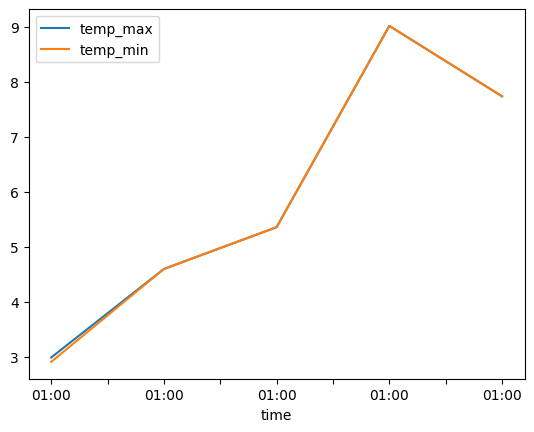

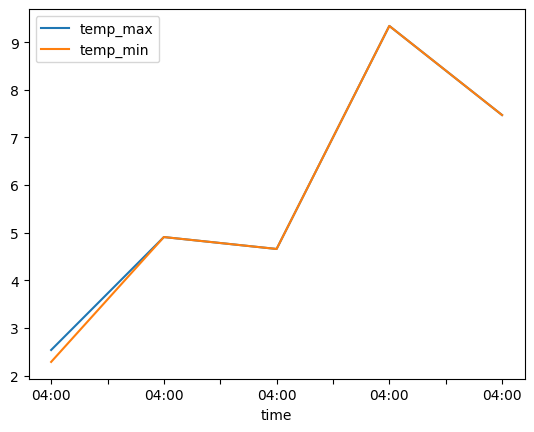

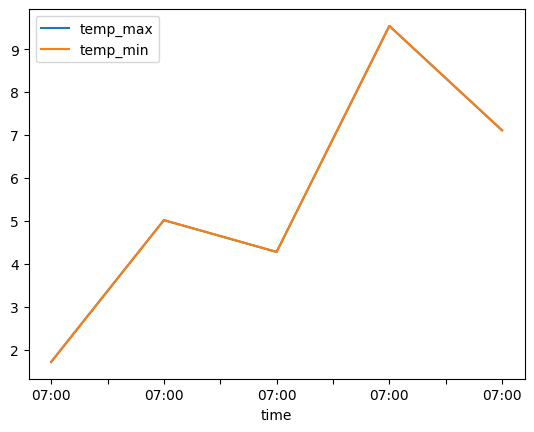

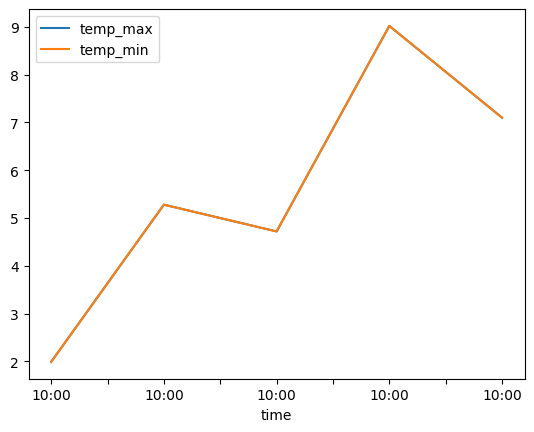

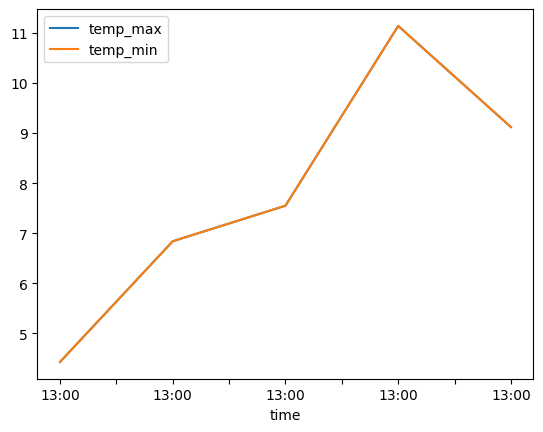

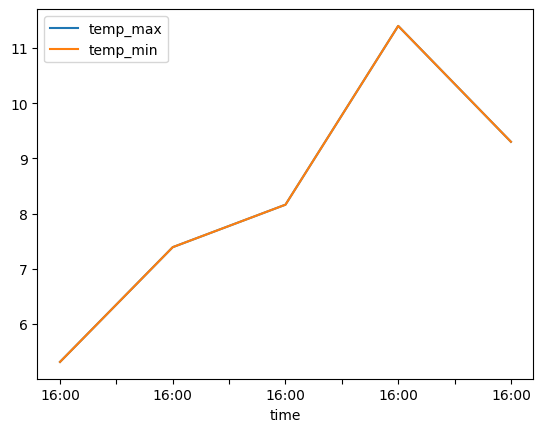

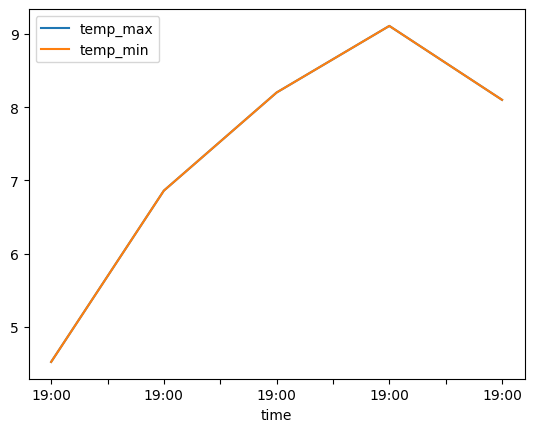

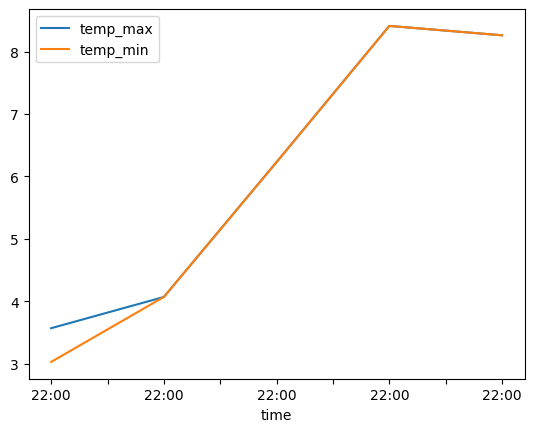

In [18]:
df2_grp.plot()